##**Machine Learning for Smart Health Systems: Project-3**

**Instructions**

* Select a 12 lead ECG database (e.g. St. Petersburg INCART Database or PTB Diagnostic ECG database) from Physionet and read the dataset descriptions to identify the heart patient types (e.g MI, CAD, TIA, Other)

* Have a look at the project 3 starter notebook

* load and process the dataset using python WFDB, neurokit, biosppy etc. packages

* read about the different ECG channels and pick the best channel signal e.g. V2, V5 etc.

* divide each ECG record into 1 minute chunks so in total you have 32 x no of hours x 60 ~ 23000 samples

**Option 1 (INCART):**

* Develop an articial neural network for multi-category heart disease classification from single channel ECG

* Develop a 1-D convolutional neural network for multi-category heart disease classification from single channel ECG

* Compare the performances of the developed deep learning models

* Upload/Pull request your notebook on Smart Health course Github Project-3 branch

**Option 2 (PTBDB) :**

* Develop an articial neural network for myocardial infarction classification from healthy subjects using single channel ECG

* Develop a 1-D convolutional neural network for multi-category heart disease classification from single channel ECG

* Compare the performances of the developed deep learning models

* Upload/Pull request your notebook on Smart Health course Github 
Project-3 branch

**Option 3 (data_arrhythmia.csv) :**

* read the dataset details from here https://archive.ics.uci.edu/ml/datasets/arrhythmia

* Develop an articial neural network for arrhythmia classification from healthy subjects using single channel ECG

* Develop a 1-D convolutional neural network for arrythmiya classification from single channel ECG

* Compare the performances of the developed deep learning models

* Upload/Pull request your notebook on Smart Health course Github Project-3 branch

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from keras.layers import Dropout
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/juberrahman/Smart-Health/main/Project-3/data_arrhythmia.csv', delimiter=';')
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [3]:
print(df['diagnosis'].unique())
pd.Series(df['diagnosis'].unique()).sort_values()

[ 8  6 10  1  7 14  3 16  2  4  5  9 15]


3      1
8      2
6      3
9      4
10     5
1      6
4      7
0      8
11     9
2     10
5     14
12    15
7     16
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [5]:
df['diagnosis'].dtype

dtype('int64')

In [6]:
df.isnull().values.sum()

0

In [7]:
# Removing the values with '?' and replacing them with 0
df[['T','P','J','QRST','heart_rate']]=df[['T','P','J','QRST','heart_rate']].replace('?',0)

In [8]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,0,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,0,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,0,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,0,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,0,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


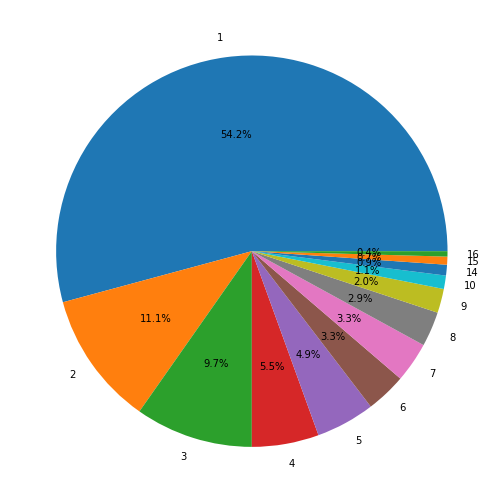

In [9]:
#pie chart of Diagnosis target of dataset
target_dist=df['diagnosis'].value_counts()
fig = plt.figure(figsize=(10, 9))
plt.pie(target_dist,labels=['1','2','3','4','5','6','7','8','9','10','14','15','16'],autopct='%1.1f%%')
plt.show()

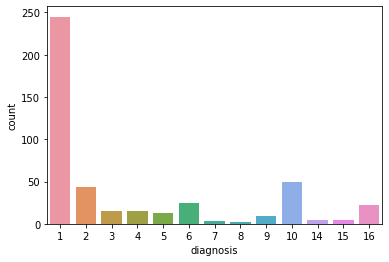

In [10]:
#plot countplot for diagnosis
sns.countplot(df['diagnosis'])

 Note: All diagnoses are classified as either normal or risky. Risky being the positive case and normal being the negative case, So diagnosis feature is  used to create a feature 'label' as follows:

Healthy = 0

Risky = 1

In [11]:
normal_risk_list = []
for diagnose in df.diagnosis:
    if diagnose == 1:
        normal_risk_list.append(0)
    else:
        normal_risk_list.append(1)
df['label'] = np.array(normal_risk_list)
df.drop(columns = ['diagnosis'],inplace = True)
df.label.value_counts()

0    245
1    207
Name: label, dtype: int64

In [12]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,label
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,0,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,0,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,1
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,0,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,0
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,0,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,0
448,37,0,190,85,100,137,361,201,73,86,66,52,79,0,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,1
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,1
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,0


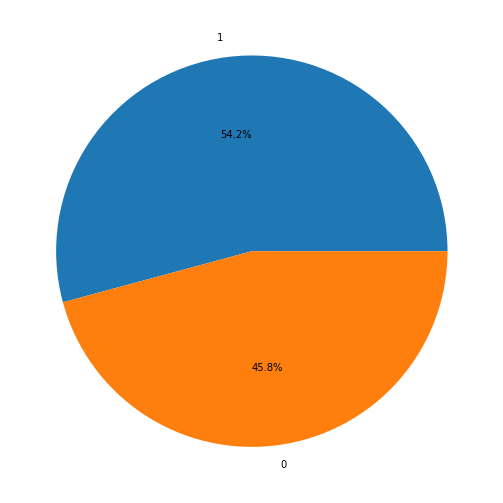

In [13]:
#pie chart of label feature
target_dist=df['label'].value_counts()
fig = plt.figure(figsize=(10, 9))
plt.pie(target_dist,labels=['1','0'],autopct='%1.1f%%')
plt.show()

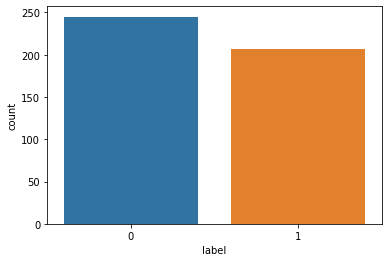

In [14]:
#plot countplot for label
sns.countplot(df['label'])

Comments: No need for sampling techniques as data seems to be balanced.

In [15]:
X=df.drop(['label'], axis=1)
y=df['label']

In [16]:
X = np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

In [17]:
X = pd.DataFrame(StandardScaler().fit_transform(X))
y_cat = to_categorical(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.20)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 279)
(91, 279)
(361, 2)
(91, 2)


###**ANN**

In [20]:
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [21]:
model1 = Sequential()
model1.add(Dense(60, input_shape = (279,), activation = "relu"))
model1.add(Dense(15, activation = "relu"))
model1.add(Dropout(0.2))
model1.add(Dense(2, activation = "softmax"))
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                16800     
                                                                 
 dense_1 (Dense)             (None, 15)                915       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 32        
                                                                 
Total params: 17,747
Trainable params: 17,747
Non-trainable params: 0
_________________________________________________________________


In [22]:
batch_size=200
model1.fit(X_train, y_train,batch_size=batch_size,verbose=1, epochs=35, validation_split=0.20)

Epoch 1/35
2/2 [==============================] - 1s 219ms/step - loss: 0.7875 - accuracy: 0.5000 - val_loss: 0.7362 - val_accuracy: 0.4658
Epoch 2/35
2/2 [==============================] - 0s 25ms/step - loss: 0.6906 - accuracy: 0.6181 - val_loss: 0.7053 - val_accuracy: 0.5205
Epoch 3/35
2/2 [==============================] - 0s 25ms/step - loss: 0.6544 - accuracy: 0.6250 - val_loss: 0.6824 - val_accuracy: 0.5753
Epoch 4/35
2/2 [==============================] - 0s 26ms/step - loss: 0.5897 - accuracy: 0.6910 - val_loss: 0.6658 - val_accuracy: 0.6164
Epoch 5/35
2/2 [==============================] - 0s 24ms/step - loss: 0.5663 - accuracy: 0.7431 - val_loss: 0.6536 - val_accuracy: 0.6164
Epoch 6/35
2/2 [==============================] - 0s 27ms/step - loss: 0.5238 - accuracy: 0.7743 - val_loss: 0.6460 - val_accuracy: 0.6027
Epoch 7/35
2/2 [==============================] - 0s 38ms/step - loss: 0.5066 - accuracy: 0.7847 - val_loss: 0.6386 - val_accuracy: 0.6164
Epoch 8/35
2/2 [==========

In [23]:
score, acc = model1.evaluate(X_test, y_test,batch_size=batch_size, verbose=1)

1/1 [==============================] - 0s 23ms/step - loss: 0.4169 - accuracy: 0.8132


In [24]:
#Print confusion matrix and classification report
y_pred = model1.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
cm_ann=confusion_matrix(y_test_class, y_pred_class)
print(cm_ann)
print(classification_report(y_test_class, y_pred_class))

[[39  8]
 [ 9 35]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.81      0.80      0.80        44

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



Comment: The Accuracy Score using the ANN model is 81% which is not bad.

###**CNN**

In [25]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D, Dropout,MaxPool1D

In [26]:
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)
print("y Train shape: ", y_train.shape)
print("y Test shape: ", y_test.shape)

X Train shape:  (361, 279)
X Test shape:  (91, 279)
y Train shape:  (361, 2)
y Test shape:  (91, 2)


In [27]:
#Reshape train and test data 
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (361, 279, 1)
X Test shape:  (91, 279, 1)


**Basic Sequential CNN Model : with 1 convolutional layer and 3 dense layers**

In [28]:
model2 = Sequential()
#CNN convolution layer  with 64 filters
model2.add(Conv1D(64, 2, activation="relu", input_shape=(279,1)))
#Add a dense layer with 32 neurons
model2.add(Dense(32, activation="relu"))
#Add CNN layer with Max pooling
model2.add(MaxPooling1D())
#Flatten the output
model2.add(Flatten())
#Add a dense layer with 20 neurons
model2.add(Dense(20, activation = 'softmax'))
#Add a dense layer with 2 neurons
model2.add(tf.keras.layers.Dense(2, activation=tf.nn.sigmoid))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 278, 64)           192       
                                                                 
 dense_3 (Dense)             (None, 278, 32)           2080      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 139, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4448)              0         
                                                                 
 dense_4 (Dense)             (None, 20)                88980     
                                                                 
 dense_5 (Dense)             (None, 2)                 42        
                                                      

In [29]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
acc = model2.evaluate(X_train, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

12/12 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.5928
Loss: 0.6915284395217896  Accuracy: 0.5927977561950684


In [30]:
model2_history = model2.fit(X_train, y_train, epochs=35, batch_size = 200,validation_split=0.20)

Epoch 1/35
2/2 [==============================] - 1s 109ms/step - loss: 0.6911 - accuracy: 0.6111 - val_loss: 0.6902 - val_accuracy: 0.5753
Epoch 2/35
2/2 [==============================] - 0s 65ms/step - loss: 0.6867 - accuracy: 0.7292 - val_loss: 0.6865 - val_accuracy: 0.6438
Epoch 3/35
2/2 [==============================] - 0s 73ms/step - loss: 0.6821 - accuracy: 0.8021 - val_loss: 0.6844 - val_accuracy: 0.6301
Epoch 4/35
2/2 [==============================] - 0s 70ms/step - loss: 0.6758 - accuracy: 0.7743 - val_loss: 0.6826 - val_accuracy: 0.5753
Epoch 5/35
2/2 [==============================] - 0s 77ms/step - loss: 0.6664 - accuracy: 0.7500 - val_loss: 0.6776 - val_accuracy: 0.5890
Epoch 6/35
2/2 [==============================] - 0s 75ms/step - loss: 0.6533 - accuracy: 0.7708 - val_loss: 0.6679 - val_accuracy: 0.6301
Epoch 7/35
2/2 [==============================] - 0s 64ms/step - loss: 0.6374 - accuracy: 0.8056 - val_loss: 0.6601 - val_accuracy: 0.5890
Epoch 8/35
2/2 [==========

In [31]:
#Print confusion matrix and classification report
y_pred = model2.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
cm_cnn=confusion_matrix(y_test_class, y_pred_class)
print(cm_cnn)
print(classification_report(y_test_class, y_pred_class))

[[42  5]
 [15 29]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        47
           1       0.85      0.66      0.74        44

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



Train: 0.870, Test: 0.780


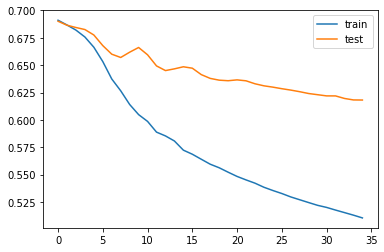

In [39]:
# evaluate the model
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(model2_history.history['loss'], label='train')
plt.plot(model2_history.history['val_loss'], label='test')
plt.legend()
plt.show()

Train: 0.870, Test: 0.780


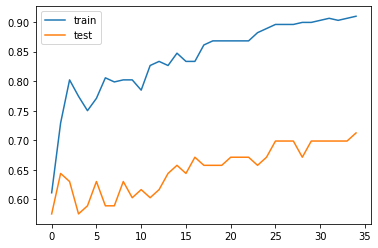

In [40]:
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.plot(model2_history.history['accuracy'], label='train')
plt.plot(model2_history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Comment: The Accuracy Score using the basic sequential CNN model is 78% which is lower than ANN model.

**Basic Sequential CNN Model : with 3 convolutional layer and 3 dense layers**

In [32]:
model3 = tf.keras.models.Sequential()
#First CNN convolution layer  with 32 filters
model3.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN convolution layer  with 64 filters
model3.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN convolution layer with 128 filters
model3.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
model3.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
# Drop out layer
model3.add(Dropout(0.5))
#Flatten the output
model3.add(Flatten())
#Add a dense layer with 256 neurons
model3.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
model3.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with 2 outputs
model3.add(Dense(units = 2, activation='softmax'))

In [33]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
acc = model3.evaluate(X_train, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

12/12 [==============================] - 1s 29ms/step - loss: 0.6940 - accuracy: 0.4321
Loss: 0.693984866142273  Accuracy: 0.4321329593658447


In [34]:
model3_history = model3.fit(X_train, y_train, epochs=35, batch_size = 200, validation_split=0.20)

Epoch 1/35
2/2 [==============================] - 2s 350ms/step - loss: 0.6800 - accuracy: 0.4583 - val_loss: 1.2746 - val_accuracy: 0.4658
Epoch 2/35
2/2 [==============================] - 1s 346ms/step - loss: 0.8616 - accuracy: 0.5278 - val_loss: 0.6396 - val_accuracy: 0.5753
Epoch 3/35
2/2 [==============================] - 1s 327ms/step - loss: 0.6159 - accuracy: 0.5660 - val_loss: 0.7015 - val_accuracy: 0.5753
Epoch 4/35
2/2 [==============================] - 1s 333ms/step - loss: 0.5613 - accuracy: 0.7118 - val_loss: 0.7145 - val_accuracy: 0.5753
Epoch 5/35
2/2 [==============================] - 1s 321ms/step - loss: 0.5206 - accuracy: 0.7465 - val_loss: 0.6143 - val_accuracy: 0.6712
Epoch 6/35
2/2 [==============================] - 1s 352ms/step - loss: 0.4576 - accuracy: 0.8021 - val_loss: 0.6345 - val_accuracy: 0.6575
Epoch 7/35
2/2 [==============================] - 1s 321ms/step - loss: 0.4050 - accuracy: 0.8264 - val_loss: 0.7709 - val_accuracy: 0.6712
Epoch 8/35
2/2 [====

In [35]:
#Print confusion matrix and classification report
y_pred = model3.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
cm_cnn=confusion_matrix(y_test_class, y_pred_class)
print(cm_cnn)
print(classification_report(y_test_class, y_pred_class))

[[33 14]
 [13 31]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        47
           1       0.69      0.70      0.70        44

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



Train: 0.934, Test: 0.703


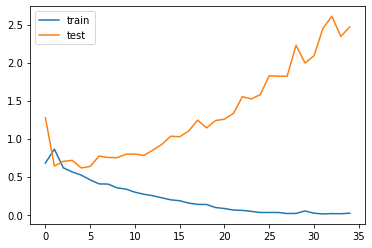

In [37]:
# evaluate the model
_, train_acc = model3.evaluate(X_train, y_train, verbose=0)
_, test_acc = model3.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(model3_history.history['loss'], label='train')
plt.plot(model3_history.history['val_loss'], label='test')
plt.legend()
plt.show()

Train: 0.934, Test: 0.703


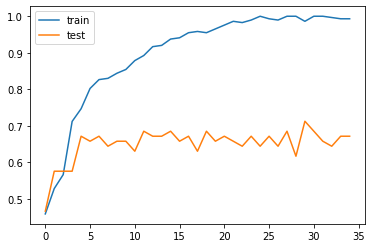

In [38]:
_, train_acc = model3.evaluate(X_train, y_train, verbose=0)
_, test_acc = model3.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.plot(model3_history.history['accuracy'], label='train')
plt.plot(model3_history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Comment: Accuracy is 70% with model3 which basic sequential model with 3 convolutional layers with 3 dense layers.